In [1]:
pip install easyocr
pip install easyocr


SyntaxError: invalid syntax (333150847.py, line 1)

In [2]:
pip install easyocr


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

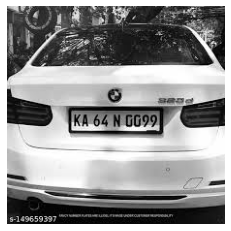

In [71]:
img = cv2.imread("/home/sai/Downloads/images.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

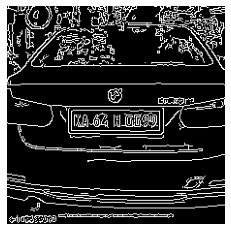

In [72]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [73]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [74]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break  

In [75]:
location

array([[[ 66, 108]],

       [[ 66, 128]],

       [[157, 128]],

       [[157, 108]]], dtype=int32)

In [76]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

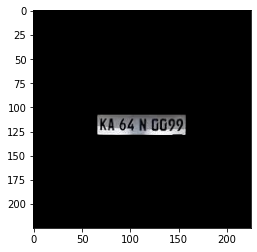

In [77]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [78]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image=gray[x1:x2+1,y1:y2+1]

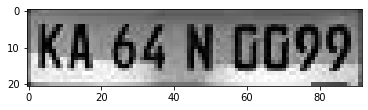

In [79]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [80]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print(result)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [92, 0], [92, 21], [0, 21]], 'Ka 64 N GG9Q', 0.3284686811500292)]


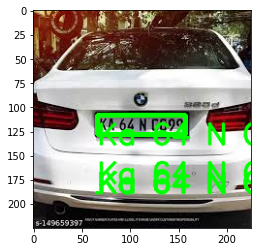

In [88]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX  # Corrected typo
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=0, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)  # Corrected typo
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)  # Corrected typo
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))  # Corrected typo
plt.show()  # Added to display the image
